# Estatística Descritiva - Estudo de Caso do Professor Tiago Haddad Marum

## Desastre ambiental em Mariana

No dia 5 de novembro de 2015, a barragem de Fundão localizada em Mariana- MG, que armazenava os rejeitos do tratamento de minério de ferro da empresa Samarco Mineração S. A. rompeu. O evento foi classificado de acordo com o Governo do Estado de Minas Gerais como o maior desastre ambiental do Brasil.

Nosso estudo de caso proposto, irá contemplar diversas atividades que visam investigar, a partir do dados de monitoramente contínuo do Instituto Mineiro de Gestão das Águas ([IGAM](https://portalinfohidro.igam.mg.gov.br/monitoramento-de-qualidade-das-aguas)) , como a concentrações de metais e parâmetros de qualidade da água do Rio Doce estão evoluindo após o rompimento da barragem.


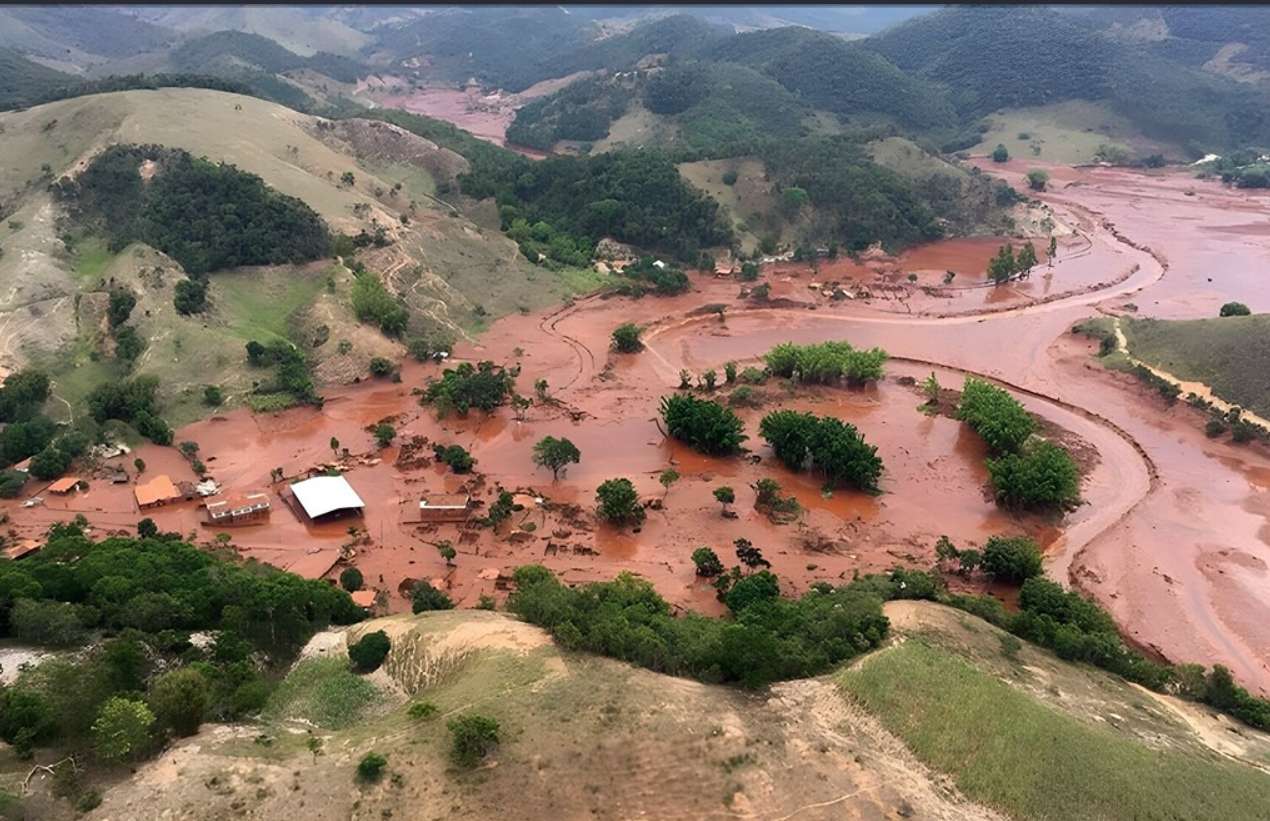

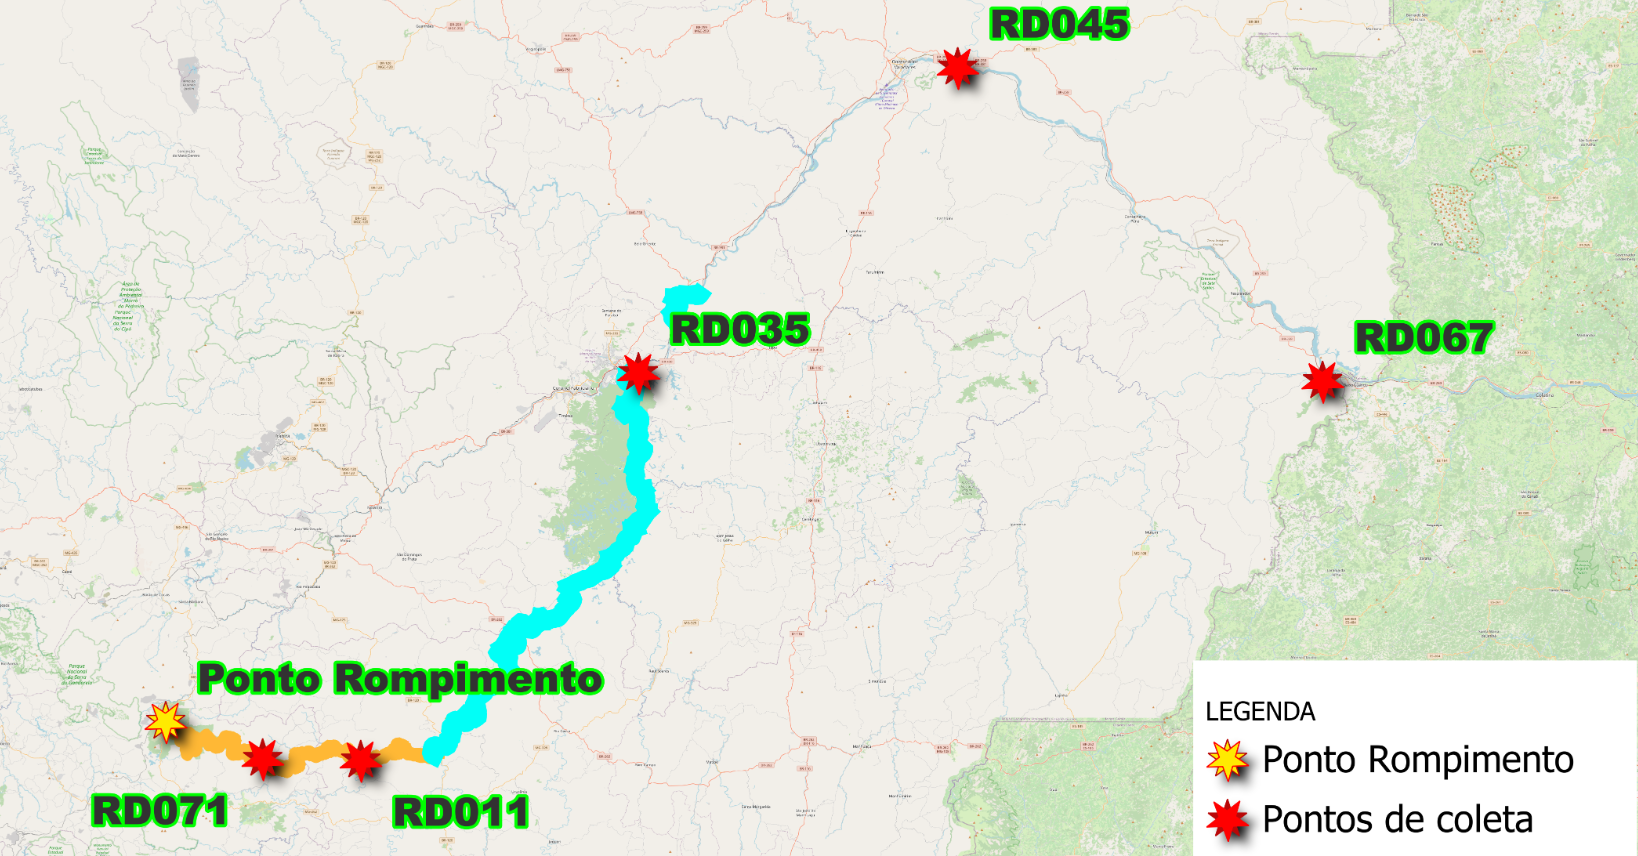

In [ ]:
import pandas as pd

# Leitura de um arquivo CSV
# dados = pd.read_csv('dados.csv')

# Escrita de um DataFrame para um arquivo CSV
# dados.to_csv('dados_saida.csv', index=False)

# URL do arquivo Excel
url = 'https://github.com/tiagomarum/aulas_ds/raw/main/analitos_original.xlsx'

# Ler o arquivo Excel diretamente da URL
df = pd.read_excel(url, engine='openpyxl')

# Exibir as primeiras linhas do DataFrame
df.head()

Data de Amostragem Estação  Manganês total  Turbidez
0 2012-01-17 10:30:00   RD071          1.6546      68.2
1 2012-01-20 10:25:00   RD035          0.3450      73.8
2 2012-01-26 16:25:00   RD045          0.1099      21.4
3 2012-01-29 17:55:00   RD067          0.0845      38.3
4 2012-04-03 11:30:00   RD071          0.8240      82.9

In [ ]:
# Renomear as colunas
novos_nomes = {
    'Data de Amostragem': 'datahora',
    'Estação': 'estacao',
    'Manganês total': 'manganes',
    'Turbidez': 'turbidez'}
df = df.rename(columns=novos_nomes)

# Exibir as primeiras linhas do DataFrame com os nomes alterados
df.head()


datahora estacao  manganes  turbidez
0 2012-01-17 10:30:00   RD071    1.6546      68.2
1 2012-01-20 10:25:00   RD035    0.3450      73.8
2 2012-01-26 16:25:00   RD045    0.1099      21.4
3 2012-01-29 17:55:00   RD067    0.0845      38.3
4 2012-04-03 11:30:00   RD071    0.8240      82.9

In [ ]:
# Quais estações estão presentes no df
print(df['estacao'].unique())

['RD071' 'RD035' 'RD045' 'RD067' 'RD011']


In [ ]:
# Contagem de resultados de manganes e turbidez por estacao
print(df.groupby('estacao')['manganes'].count())
print(df.groupby('estacao')['turbidez'].count())


estacao
RD011    60
RD035    70
RD045    79
RD067    70
RD071    79
Name: manganes, dtype: int64
estacao
RD011     60
RD035    103
RD045    103
RD067    103
RD071     79
Name: turbidez, dtype: int64


In [ ]:
# Resumo estatístico
summary_df_mg = df.groupby(['estacao'])['manganes'].agg(['count', 'mean', 'median', 'min', 'max','std'])
print(f"\n Resumo Estatístico por Ponto (Manganês Total):")
print(summary_df_mg)

summary_df_turbidez = df.groupby(['estacao'])['turbidez'].agg(['count', 'mean', 'median', 'min', 'max','std'])
print(f"\n Resumo Estatístico por Ponto (Turbidez):")
print(summary_df_turbidez)



 Resumo Estatístico por Ponto (Manganês Total):
         count      mean    median       min       max       std
estacao                                                         
RD011       60  0.684700  0.218525  0.033027  5.797405  1.125058
RD035       70  0.236350  0.153179  0.028654  1.821000  0.249558
RD045       79  0.165732  0.036700  0.009700  5.637000  0.641540
RD067       70  0.064265  0.021517  0.003000  1.578000  0.191501
RD071       79  0.412741  0.144180  0.022000  4.842959  0.673463

 Resumo Estatístico por Ponto (Turbidez):
         count        mean  median   min     max         std
estacao                                                     
RD011       60  254.899500    52.7  3.57  4105.0  594.440360
RD035      103  242.301942    48.9  2.56  7470.0  841.693618
RD045      103  163.249903    20.6  0.50  4672.0  631.546787
RD067      103  150.230971    16.5  1.55  6500.0  678.969773
RD071       79  197.451392    29.5  1.80  5228.0  699.653522


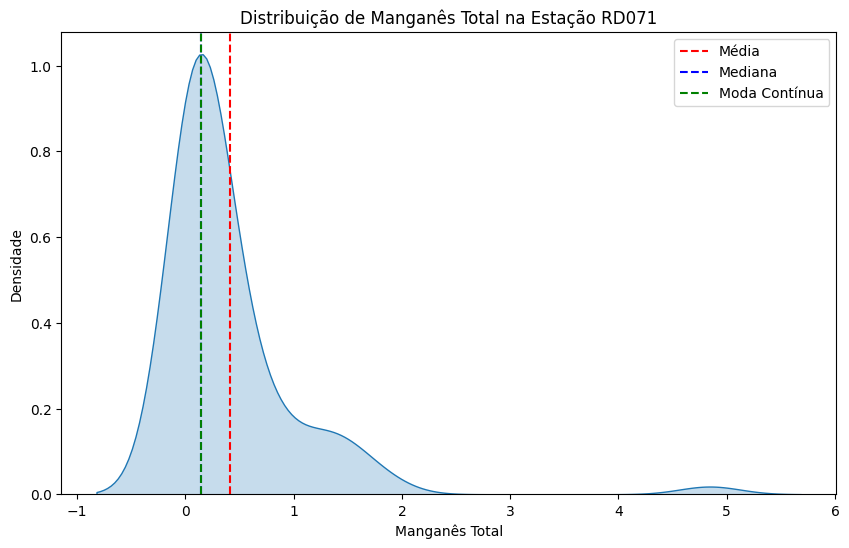

Média: 0.41274137989803067
Moda Contínua: 0.14747040262942943
Mediana: 0.1441798624


In [ ]:
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np

# Filtrar o ponto RD071
df_RD071 = df[df['estacao'] == 'RD071']
# Remover valores NaN ou infinitos na coluna 'manganes'
df_RD071 = df_RD071[np.isfinite(df_RD071['manganes'])]

# Calcular média, moda e mediana
media_RD071 = df_RD071['manganes'].mean()
mediana_RD071 = df_RD071['manganes'].median()

# Calcular a moda contínua utilizando KDE
kde = gaussian_kde(df_RD071['manganes'], bw_method='scott')
x_values = np.linspace(df_RD071['manganes'].min(), df_RD071['manganes'].max(), 1000)
kde_values = kde(x_values)
moda_RD071_continua = x_values[np.argmax(kde_values)]

# Plotar o density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df_RD071['manganes'], fill=True)
plt.axvline(media_RD071, color='red', linestyle='--', label='Média')
plt.axvline(mediana_RD071, color='blue', linestyle='--', label='Mediana')
plt.axvline(moda_RD071_continua, color='green', linestyle='--', label='Moda Contínua')
plt.title('Distribuição de Manganês Total na Estação RD071')
plt.xlabel('Manganês Total')
plt.ylabel('Densidade')
plt.legend()
plt.show()

# Exibir os valores calculados
print(f'Média: {media_RD071}')
print(f'Moda Contínua: {moda_RD071_continua}')
print(f'Mediana: {mediana_RD071}')

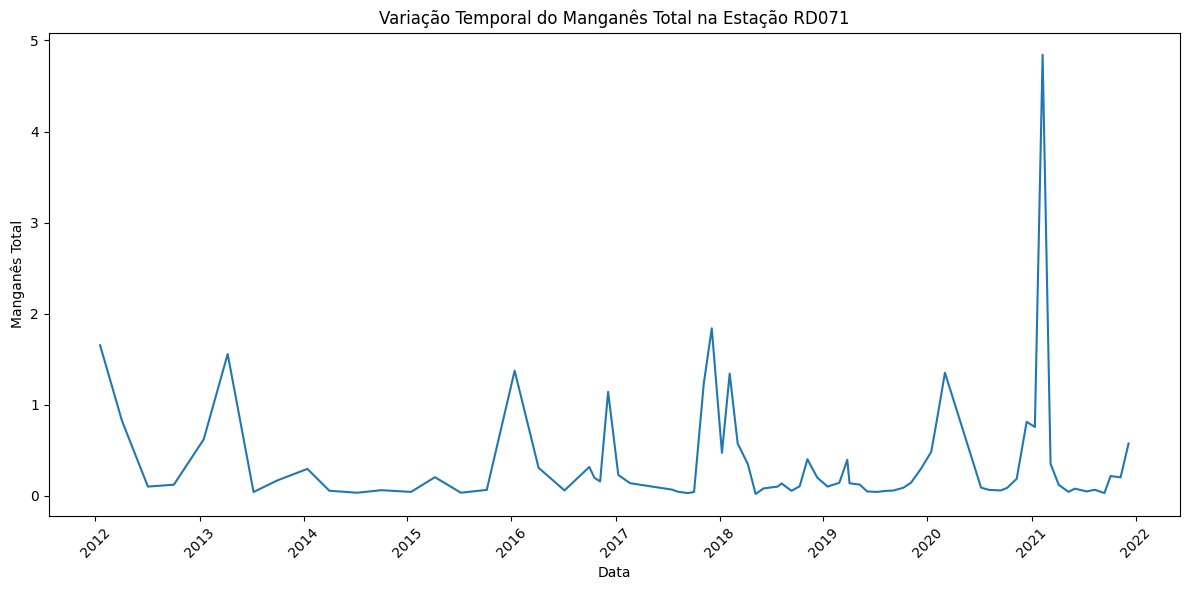

In [ ]:
# prompt: plot temporal do RD071

# Converter a coluna 'datahora' para datetime
df_RD071['datahora'] = pd.to_datetime(df_RD071['datahora'])

# Ordenar o DataFrame pela data
df_RD071 = df_RD071.sort_values('datahora')

# Plotar o gráfico temporal
plt.figure(figsize=(12, 6))
plt.plot(df_RD071['datahora'], df_RD071['manganes'])
plt.title('Variação Temporal do Manganês Total na Estação RD071')
plt.xlabel('Data')
plt.ylabel('Manganês Total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()